In [12]:
import pandas as pd 


In [13]:
accountDataFrame = pd.DataFrame(columns=['accounts' , 'isExcludedFromFee','isExcluded' , 'tVal' , 'rVal' ])
txDataFrame = pd.DataFrame(columns=['from' , 'to' , 'txVal'])
spaceDataFrame = pd.DataFrame(columns=[ 'index','rSpace' , 'tSpace' , 'ratio','sumR_Accounts' , 'sumT_Accounts' , 'deltaR' , 'deltaT'])

In [14]:
MAX = int('ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff',16)
Tt = 300*10**6
Tx = 2*10**4
BurnRate = 5/100
ReflectionRate = 5/100
print(Tx)

20000


In [15]:
def calculateSpacesWithAccounts(lastSpaceDataFrame):
    sumR = 0 
    sumT = 0 
    for var in range(len(accountDataFrame)):
        sumR += accountDataFrame.loc[var , 'rVal']
        sumT += (accountDataFrame.loc[var , 'rVal']/spaceDataFrame.loc[lastSpaceDataFrame , 'ratio'])
        
    spaceDataFrame.loc[lastSpaceDataFrame , 'sumR_Accounts'] = sumR
    spaceDataFrame.loc[lastSpaceDataFrame , 'sumT_Accounts'] = sumT
    spaceDataFrame.loc[lastSpaceDataFrame , 'deltaR'] = (spaceDataFrame.loc[lastSpaceDataFrame , 'sumR_Accounts'] - spaceDataFrame.loc[lastSpaceDataFrame , 'rSpace'])/spaceDataFrame.loc[lastSpaceDataFrame , 'rSpace']
    spaceDataFrame.loc[lastSpaceDataFrame , 'deltaT'] = (spaceDataFrame.loc[lastSpaceDataFrame , 'sumT_Accounts'] - spaceDataFrame.loc[lastSpaceDataFrame , 'tSpace'])/spaceDataFrame.loc[lastSpaceDataFrame , 'tSpace']


In [16]:
#initialize Tx Table 

for var in range(9): 
    txDataFrame.loc[var , 'from'] = 0 
    txDataFrame.loc[var , 'to'] = var+1 
    txDataFrame.loc[var , 'txVal'] =10**6 
    
#account 1 send value to account 2
#18 changed to 50
for var in range(9,50):
    txDataFrame.loc[var , 'from'] = 1 
    txDataFrame.loc[var , 'to'] = 2
    txDataFrame.loc[var , 'txVal'] =Tx

for var in range(50,100):
    txDataFrame.loc[var , 'from'] = 2 
    txDataFrame.loc[var , 'to'] = 3
    txDataFrame.loc[var , 'txVal'] = 33333

    
#initialilze Space table
def calculateRatio(i):
    return int( int(spaceDataFrame.loc[i,'rSpace'])/ int( spaceDataFrame.loc[i,'tSpace']))
spaceDataFrame.loc[0 , 'index'] =  0

spaceDataFrame.loc[0 , 'rSpace'] =  MAX - MAX%Tt
spaceDataFrame.loc[0 , 'tSpace'] =  Tt

spaceDataFrame.loc[0 , 'ratio'] =  calculateRatio( 0)


#initialize account table 
for var in range(10):
    accountDataFrame.loc[var ,'accounts'] = var 
    accountDataFrame.loc[var ,'isExcluded'] = False 
    accountDataFrame.loc[var ,'isExcludedFromFee'] = False 
    accountDataFrame.loc[var ,'tVal'] = 0
    accountDataFrame.loc[var ,'rVal'] = 0

    
    
accountDataFrame.loc[0 ,'isExcludedFromFee'] = True 
accountDataFrame.loc[0 ,'tVal'] = 0
accountDataFrame.loc[0 ,'rVal'] = MAX - MAX%Tt

calculateSpacesWithAccounts(0)

In [17]:
def sendStandardTx(burnRate , reflectionRate ,fromAccount , toAccount , txValue):
#   burn rate for example 5% 
    tBurn =int( txValue * burnRate )
    tReflection = int(txValue * reflectionRate )
#   ratio of rSpace and tSpace 
    ratio = calculateRatio(len(spaceDataFrame) - 1 ) 
    
    rBurn = int(ratio * tBurn)
    rReflection = int(ratio * tReflection)
    tTransferAmount = int(txValue - tBurn)
    rAmount = int(txValue * ratio)
    rTransferAmount =  int(rAmount - rBurn - rReflection)
    accountDataFrame.loc[toAccount , 'rVal']   = accountDataFrame.loc[toAccount , 'rVal']   + rTransferAmount  
    accountDataFrame.loc[fromAccount , 'rVal'] = accountDataFrame.loc[fromAccount ,'rVal']  - rAmount 

#   update rSpace and tSpace 
    lastSpaceDataFrame = len(spaceDataFrame)
    spaceDataFrame.loc[lastSpaceDataFrame , 'index'  ] = lastSpaceDataFrame
    spaceDataFrame.loc[lastSpaceDataFrame , 'rSpace' ] = spaceDataFrame.loc[lastSpaceDataFrame-1 , 'rSpace' ] - (rBurn+rReflection)
    spaceDataFrame.loc[lastSpaceDataFrame , 'tSpace' ] = spaceDataFrame.loc[lastSpaceDataFrame-1 , 'tSpace' ] - tBurn 
    
    spaceDataFrame.loc[lastSpaceDataFrame , 'ratio' ] = spaceDataFrame.loc[lastSpaceDataFrame , 'rSpace' ] / spaceDataFrame.loc[lastSpaceDataFrame , 'tSpace' ]
    calculateSpacesWithAccounts(lastSpaceDataFrame)


    
    
    

In [18]:
#claculate Txs 
def calculateTx(var):
    fromAccount = txDataFrame.loc[var , 'from']
    toAccount   = txDataFrame.loc[var , 'to']
    txValue     = txDataFrame.loc[var , 'txVal']
    if((accountDataFrame.loc[fromAccount , 'isExcludedFromFee']) or (accountDataFrame.loc[toAccount , 'isExcludedFromFee']) ):
        sendStandardTx(0 , 0 , fromAccount , toAccount , txValue) 
    else :
        sendStandardTx(BurnRate , ReflectionRate , fromAccount , toAccount , txValue) 
    
# print(len(txDataFrame))
for var in range(len(txDataFrame)):
    calculateTx( var )


In [19]:
import matplotlib.pyplot as plt

In [20]:
spaceDataFrame

,index,rSpace,tSpace,ratio,sumR_Accounts,sumT_Accounts,deltaR,deltaT
0,0,1157920892373161954235709850086879078532699846...,300000000,3859736307910539928207933857470014401102663313...,1157920892373161954235709850086879078532699846...,300000000.0,0.0,0.0
1,1,1157920892373161954235709850086879078532699846...,300000000,3859736307910539928207933857470014401102663313...,1157920892373161954235709850086879078532699846...,300000000.0,0.0,0.0
2,2,1157920892373161954235709850086879078532699846...,300000000,3859736307910539928207933857470014401102663313...,1157920892373161954235709850086879078532699846...,300000000.0,0.0,0.0
3,3,1157920892373161954235709850086879078532699846...,300000000,3859736307910539928207933857470014401102663313...,1157920892373161954235709850086879078532699846...,300000000.0,0.0,0.0
4,4,1157920892373161954235709850086879078532699846...,300000000,3859736307910539928207933857470014401102663313...,1157920892373161954235709850086879078532699846...,300000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
96,96,1157012980362843311285876290176930189874222855...,299882364,3858222820875332499460917915972619266686422862...,1157012980362843311285876290176930189874222855...,299882364.0,0.0,-0.0
97,97,1157000124764404154677988086398434169106826256...,299880698,3858201386353996416783271477449221776632000429...,1157000124764404154677988086398434169106826256...,299880698.0,0.0,-0.0
98,98,1156987269237384823161927364537871308299866518...,299879032,3858179951832660334105625038925824286577577996...,1156987269237384823161927364537871308299866518...,299879032.0,0.0,0.0
99,99,1156974413781785316737694124595241607453343642...,299877366,3858158517311324251427978600402426796523155564...,1156974413781785316737694124595241607453343642...,299877366.0,0.0,-0.0


<AxesSubplot:xlabel='index', ylabel='tSpace'>

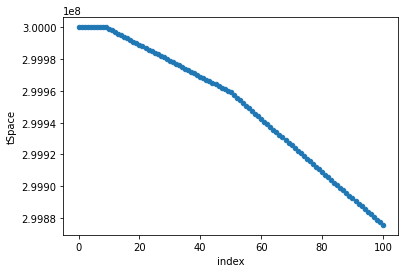

In [21]:
spaceDataFrame.plot(x ='index', y='tSpace', kind = 'scatter')

In [22]:
accountDataFrame

,accounts,isExcludedFromFee,isExcluded,tVal,rVal
0,0,True,False,0,1123183265601967094881838445369648948922775876...
1,1,False,False,0,6949635350453951070920786135200137896826702905...
2,2,False,False,0,2769566764101221452992894817959982028694819473...
3,3,False,False,0,9647954736719783701810949960760019245313618335...
4,4,False,False,0,3859736307910539928207933857470014401102663313...
5,5,False,False,0,3859736307910539928207933857470014401102663313...
6,6,False,False,0,3859736307910539928207933857470014401102663313...
7,7,False,False,0,3859736307910539928207933857470014401102663313...
8,8,False,False,0,3859736307910539928207933857470014401102663313...
9,9,False,False,0,3859736307910539928207933857470014401102663313...
